# The Machine Learning Group Challenge!

##  Today's Mission
- Your objective is to devise the best possible model to predict successful/default loans using a preprocessed version of the Lending Club loan dataset.

- Class into divided into 2 groups.

- The training data is 13689 loans labeled either as 1 (successful) or 0 (default). Comes with 30 categorical and numerical features. The testing data is also 13689 loans.

- A data dictionary file is included as well. It is a table explaining each what each feature means.

- Groups will judged on how much money their model makes. You will evaluate your model on the testing dataset. You cannot used testing data to train a model.

- Your profit will be determined by the amount of money you make from correctly predicting good loans (loan amount * interest rate/100.) subtracted by the money you lose from incorrectly predicting bad loans as good (-loan amount). I have given a function to calculate that.

- Finding the correct probability threshold will be super key in determing how much money you make.

- **VERY IMPORTANT:** You must transform your testing the data the same way you did your training data. So make sure you have the same columns in the same order.
        
- Stewart and I will be on be hand for guidance. However I want you to primarily use your teammates for help. 

- Use all the tools at your disposal, try all the models we've learned in class. Refer to past class notebooks for help. Be sure to use modeling evaluating techniques such as ROC curves, confusion matrix, recall/precision, etc.

- I recommend starting off simple by using a small number of features

- To optimize model, find the right combination of features and the right model with the right parameters. Get creative!

- Remember to use your time wisely, it will go by fast. Communicate amongst yourselves often.
   

### Online resources on Lending Club loan data
Kaggle Page: https://www.kaggle.com/wendykan/lending-club-loan-data. Make sure to check out the kernels section.

Y Hat tutorial (It's in R, but its still useful): http://blog.yhat.com/posts/machine-learning-for-predicting-bad-loans.html

Blog tutorial on the data from Kevin Davenport: http://kldavenport.com/lending-club-data-analysis-revisted-with-python/



### Class Time
No class breaks. But individual breaks are allowed of course.

- 6:30 - 7:00
    - Feature engineering/selection: make dummy variables, dropping features, scaling, and other methods of transforming data. 
    - Exploratory data analysis aka get to know your features time.
    
    
- 7:00 - 8:45
    - Modeling time!!
    
    
- 8:45 - 9:25
    - Model testing.
    
    
- 9:25 - 9:30
    - Winner decision. Exit tickets.

In [276]:
pwd


'/Users/TJR/Desktop/DS-SF-43/notebooks/In_Class'

In [61]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("fivethirtyeight")
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification;
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

In [11]:
#Imports and set pandas options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
pd.set_option("max.columns", 100)
pd.set_option("max.colwidth", 100)

In [12]:
# Load in training data.
# Loan_status column is the target variable. Remember to drop it from df.
train = pd.read_csv("../../data/lending_club/challenge_training_data.csv")
train.head(2)

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,desc,purpose,title,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
0,742238,3150.0,3150.0,36 months,10.99%,103.12,B,A-1 Casino Rd Mini Storage,9 years,RENT,15300.0,Verified,1,Borrower added on 05/02/11 > I plan to use these funds to pay off a higher rate credit card.<b...,debt_consolidation,lowerinterest,19.76,0.0,695.0,699.0,0.0,5.0,0.0,9316.0,76.4%,9.0,Feb-2014,0.0,0.0,0.0
1,567423,10000.0,10000.0,36 months,7.51%,311.11,A,ORION MECHANICAL INC.,4 years,OWN,125000.0,Not Verified,1,Borrower added on 08/19/10 > CONSOLIDATE OUT STANDING CREDIT CARD LOANS AND PURCHASES FOR NEW ...,debt_consolidation,CONSOLIDATE,18.43,0.0,800.0,804.0,1.0,16.0,0.0,25364.0,2.9%,40.0,Feb-2017,0.0,0.0,0.0


In [20]:
train.rename(columns={'dti': 'debt_to_income'}, inplace=True)
train.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,desc,purpose,title,debt_to_income,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
0,742238,3150.0,3150.0,36 months,10.99%,103.12,B,A-1 Casino Rd Mini Storage,9 years,RENT,15300.0,Verified,1,Borrower added on 05/02/11 > I plan to use these funds to pay off a higher rate credit card.<b...,debt_consolidation,lowerinterest,19.76,0.0,695.0,699.0,0.0,5.0,0.0,9316.0,76.4%,9.0,Feb-2014,0.0,0.0,0.0
1,567423,10000.0,10000.0,36 months,7.51%,311.11,A,ORION MECHANICAL INC.,4 years,OWN,125000.0,Not Verified,1,Borrower added on 08/19/10 > CONSOLIDATE OUT STANDING CREDIT CARD LOANS AND PURCHASES FOR NEW ...,debt_consolidation,CONSOLIDATE,18.43,0.0,800.0,804.0,1.0,16.0,0.0,25364.0,2.9%,40.0,Feb-2017,0.0,0.0,0.0
2,457181,11000.0,11000.0,36 months,12.53%,368.13,B,"U.S. Government, Dept of Homeland Securi",3 years,RENT,81600.0,Not Verified,1,"568147 added on 11/04/09 > Personal Loan, Deposited to TD nov 04 2009<br/> 568147 added on 11/...",other,Personal Loan 11/2009,5.12,0.0,725.0,729.0,2.0,5.0,0.0,358.0,7.5%,10.0,Feb-2017,0.0,0.0,0.0
3,872939,2200.0,2200.0,36 months,13.49%,74.65,C,Boeing,5 years,OWN,80000.0,Verified,1,"I'll use this to finish paying off my credit cards. I do make $80k a year, so I expect that I'll...",debt_consolidation,LendingClubLoan,3.27,0.0,700.0,704.0,0.0,2.0,0.0,10142.0,95.7%,6.0,Sep-2011,0.0,0.0,0.0
4,448219,4500.0,4500.0,36 months,13.22%,152.11,C,Charles Wright Academy,4 years,RENT,30555.0,Not Verified,1,"I am a single mother to a wonderful 7 year old girl. We have had our share of difficulties, most...",debt_consolidation,"Medical, Consolidation, & Kauai, Oh My!",4.32,0.0,690.0,694.0,1.0,4.0,1.0,3371.0,88.7%,14.0,Feb-2017,0.0,0.0,0.0


In [75]:
train.replace({'home_ownership' : { 'OWN' : 1, 'RENT' : 2}}, inplace = True)
train.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,desc,purpose,title,debt_to_income,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
0,742238,3150.0,3150.0,36 months,10.99%,103.12,B,A-1 Casino Rd Mini Storage,9 years,2,15300.0,Verified,1,Borrower added on 05/02/11 > I plan to use these funds to pay off a higher rate credit card.<b...,debt_consolidation,lowerinterest,19.76,0.0,695.0,699.0,0.0,5.0,0.0,9316.0,76.4%,9.0,Feb-2014,0.0,0.0,0.0
1,567423,10000.0,10000.0,36 months,7.51%,311.11,A,ORION MECHANICAL INC.,4 years,1,125000.0,Not Verified,1,Borrower added on 08/19/10 > CONSOLIDATE OUT STANDING CREDIT CARD LOANS AND PURCHASES FOR NEW ...,debt_consolidation,CONSOLIDATE,18.43,0.0,800.0,804.0,1.0,16.0,0.0,25364.0,2.9%,40.0,Feb-2017,0.0,0.0,0.0
2,457181,11000.0,11000.0,36 months,12.53%,368.13,B,"U.S. Government, Dept of Homeland Securi",3 years,2,81600.0,Not Verified,1,"568147 added on 11/04/09 > Personal Loan, Deposited to TD nov 04 2009<br/> 568147 added on 11/...",other,Personal Loan 11/2009,5.12,0.0,725.0,729.0,2.0,5.0,0.0,358.0,7.5%,10.0,Feb-2017,0.0,0.0,0.0
3,872939,2200.0,2200.0,36 months,13.49%,74.65,C,Boeing,5 years,1,80000.0,Verified,1,"I'll use this to finish paying off my credit cards. I do make $80k a year, so I expect that I'll...",debt_consolidation,LendingClubLoan,3.27,0.0,700.0,704.0,0.0,2.0,0.0,10142.0,95.7%,6.0,Sep-2011,0.0,0.0,0.0
4,448219,4500.0,4500.0,36 months,13.22%,152.11,C,Charles Wright Academy,4 years,2,30555.0,Not Verified,1,"I am a single mother to a wonderful 7 year old girl. We have had our share of difficulties, most...",debt_consolidation,"Medical, Consolidation, & Kauai, Oh My!",4.32,0.0,690.0,694.0,1.0,4.0,1.0,3371.0,88.7%,14.0,Feb-2017,0.0,0.0,0.0


In [77]:
train.replace({'home_ownership' : { 'MORTGAGE' : 3}}, inplace = True)
train.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,desc,purpose,title,debt_to_income,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
0,742238,3150.0,3150.0,36 months,10.99%,103.12,B,A-1 Casino Rd Mini Storage,9 years,2,15300.0,Verified,1,Borrower added on 05/02/11 > I plan to use these funds to pay off a higher rate credit card.<b...,debt_consolidation,lowerinterest,19.76,0.0,695.0,699.0,0.0,5.0,0.0,9316.0,76.4%,9.0,Feb-2014,0.0,0.0,0.0
1,567423,10000.0,10000.0,36 months,7.51%,311.11,A,ORION MECHANICAL INC.,4 years,1,125000.0,Not Verified,1,Borrower added on 08/19/10 > CONSOLIDATE OUT STANDING CREDIT CARD LOANS AND PURCHASES FOR NEW ...,debt_consolidation,CONSOLIDATE,18.43,0.0,800.0,804.0,1.0,16.0,0.0,25364.0,2.9%,40.0,Feb-2017,0.0,0.0,0.0
2,457181,11000.0,11000.0,36 months,12.53%,368.13,B,"U.S. Government, Dept of Homeland Securi",3 years,2,81600.0,Not Verified,1,"568147 added on 11/04/09 > Personal Loan, Deposited to TD nov 04 2009<br/> 568147 added on 11/...",other,Personal Loan 11/2009,5.12,0.0,725.0,729.0,2.0,5.0,0.0,358.0,7.5%,10.0,Feb-2017,0.0,0.0,0.0
3,872939,2200.0,2200.0,36 months,13.49%,74.65,C,Boeing,5 years,1,80000.0,Verified,1,"I'll use this to finish paying off my credit cards. I do make $80k a year, so I expect that I'll...",debt_consolidation,LendingClubLoan,3.27,0.0,700.0,704.0,0.0,2.0,0.0,10142.0,95.7%,6.0,Sep-2011,0.0,0.0,0.0
4,448219,4500.0,4500.0,36 months,13.22%,152.11,C,Charles Wright Academy,4 years,2,30555.0,Not Verified,1,"I am a single mother to a wonderful 7 year old girl. We have had our share of difficulties, most...",debt_consolidation,"Medical, Consolidation, & Kauai, Oh My!",4.32,0.0,690.0,694.0,1.0,4.0,1.0,3371.0,88.7%,14.0,Feb-2017,0.0,0.0,0.0


In [81]:
train.replace({'home_ownership' : { 'OTHER' : 4}}, inplace = True)
train.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,desc,purpose,title,debt_to_income,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
0,742238,3150.0,3150.0,36 months,10.99%,103.12,B,A-1 Casino Rd Mini Storage,9 years,2,15300.0,Verified,1,Borrower added on 05/02/11 > I plan to use these funds to pay off a higher rate credit card.<b...,debt_consolidation,lowerinterest,19.76,0.0,695.0,699.0,0.0,5.0,0.0,9316.0,76.4%,9.0,Feb-2014,0.0,0.0,0.0
1,567423,10000.0,10000.0,36 months,7.51%,311.11,A,ORION MECHANICAL INC.,4 years,1,125000.0,Not Verified,1,Borrower added on 08/19/10 > CONSOLIDATE OUT STANDING CREDIT CARD LOANS AND PURCHASES FOR NEW ...,debt_consolidation,CONSOLIDATE,18.43,0.0,800.0,804.0,1.0,16.0,0.0,25364.0,2.9%,40.0,Feb-2017,0.0,0.0,0.0
2,457181,11000.0,11000.0,36 months,12.53%,368.13,B,"U.S. Government, Dept of Homeland Securi",3 years,2,81600.0,Not Verified,1,"568147 added on 11/04/09 > Personal Loan, Deposited to TD nov 04 2009<br/> 568147 added on 11/...",other,Personal Loan 11/2009,5.12,0.0,725.0,729.0,2.0,5.0,0.0,358.0,7.5%,10.0,Feb-2017,0.0,0.0,0.0
3,872939,2200.0,2200.0,36 months,13.49%,74.65,C,Boeing,5 years,1,80000.0,Verified,1,"I'll use this to finish paying off my credit cards. I do make $80k a year, so I expect that I'll...",debt_consolidation,LendingClubLoan,3.27,0.0,700.0,704.0,0.0,2.0,0.0,10142.0,95.7%,6.0,Sep-2011,0.0,0.0,0.0
4,448219,4500.0,4500.0,36 months,13.22%,152.11,C,Charles Wright Academy,4 years,2,30555.0,Not Verified,1,"I am a single mother to a wonderful 7 year old girl. We have had our share of difficulties, most...",debt_consolidation,"Medical, Consolidation, & Kauai, Oh My!",4.32,0.0,690.0,694.0,1.0,4.0,1.0,3371.0,88.7%,14.0,Feb-2017,0.0,0.0,0.0


In [85]:
train.replace({'home_ownership' : { 'NONE' : 5}}, inplace = True)
train.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,desc,purpose,title,debt_to_income,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
0,742238,3150.0,3150.0,36 months,10.99%,103.12,B,A-1 Casino Rd Mini Storage,9 years,2,15300.0,Verified,1,Borrower added on 05/02/11 > I plan to use these funds to pay off a higher rate credit card.<b...,debt_consolidation,lowerinterest,19.76,0.0,695.0,699.0,0.0,5.0,0.0,9316.0,76.4%,9.0,Feb-2014,0.0,0.0,0.0
1,567423,10000.0,10000.0,36 months,7.51%,311.11,A,ORION MECHANICAL INC.,4 years,1,125000.0,Not Verified,1,Borrower added on 08/19/10 > CONSOLIDATE OUT STANDING CREDIT CARD LOANS AND PURCHASES FOR NEW ...,debt_consolidation,CONSOLIDATE,18.43,0.0,800.0,804.0,1.0,16.0,0.0,25364.0,2.9%,40.0,Feb-2017,0.0,0.0,0.0
2,457181,11000.0,11000.0,36 months,12.53%,368.13,B,"U.S. Government, Dept of Homeland Securi",3 years,2,81600.0,Not Verified,1,"568147 added on 11/04/09 > Personal Loan, Deposited to TD nov 04 2009<br/> 568147 added on 11/...",other,Personal Loan 11/2009,5.12,0.0,725.0,729.0,2.0,5.0,0.0,358.0,7.5%,10.0,Feb-2017,0.0,0.0,0.0
3,872939,2200.0,2200.0,36 months,13.49%,74.65,C,Boeing,5 years,1,80000.0,Verified,1,"I'll use this to finish paying off my credit cards. I do make $80k a year, so I expect that I'll...",debt_consolidation,LendingClubLoan,3.27,0.0,700.0,704.0,0.0,2.0,0.0,10142.0,95.7%,6.0,Sep-2011,0.0,0.0,0.0
4,448219,4500.0,4500.0,36 months,13.22%,152.11,C,Charles Wright Academy,4 years,2,30555.0,Not Verified,1,"I am a single mother to a wonderful 7 year old girl. We have had our share of difficulties, most...",debt_consolidation,"Medical, Consolidation, & Kauai, Oh My!",4.32,0.0,690.0,694.0,1.0,4.0,1.0,3371.0,88.7%,14.0,Feb-2017,0.0,0.0,0.0


In [179]:
train.tax_liens.unique()

array([0., 1.])

In [87]:
train.int_rate = train.int_rate.str.replace("%","")
train.int_rate = train.int_rate.astype("float64")

In [168]:
train.revol_util = train.revol_util.str.replace("%","")

In [195]:
cols = ["loan_amnt", "annual_inc", "fico_range_low", "total_acc","int_rate", "installment", "open_acc","revol_bal", "purpose", "revol_util", "tax_liens","debt_to_income","delinq_2yrs","inq_last_6mths","loan_status"]
newdata = train[cols]
newdata.head()

,loan_amnt,annual_inc,fico_range_low,total_acc,int_rate,installment,open_acc,revol_bal,purpose,revol_util,tax_liens,debt_to_income,delinq_2yrs,inq_last_6mths,loan_status
0,3150.0,15300.0,695.0,9.0,10.99,103.12,5.0,9316.0,1,76.4,0.0,19.76,0.0,0.0,1
1,10000.0,125000.0,800.0,40.0,7.51,311.11,16.0,25364.0,1,2.9,0.0,18.43,0.0,1.0,1
2,11000.0,81600.0,725.0,10.0,12.53,368.13,5.0,358.0,2,7.5,0.0,5.12,0.0,2.0,1
3,2200.0,80000.0,700.0,6.0,13.49,74.65,2.0,10142.0,1,95.7,0.0,3.27,0.0,0.0,1
4,4500.0,30555.0,690.0,14.0,13.22,152.11,4.0,3371.0,1,88.7,0.0,4.32,0.0,1.0,1


In [196]:
newdata.corr()

,loan_amnt,annual_inc,fico_range_low,total_acc,int_rate,installment,open_acc,revol_bal,purpose,tax_liens,debt_to_income,delinq_2yrs,inq_last_6mths,loan_status
loan_amnt,1.000000,0.302584,0.128810,0.259847,0.291460,0.926593,0.169631,0.254794,-0.167643,-0.011027,0.073157,-0.034562,-0.053090,0.013136
annual_inc,0.302584,1.000000,0.045770,0.290302,0.065214,0.310228,0.202448,0.339139,0.020506,-0.003662,-0.121657,0.031826,0.026730,0.032233
fico_range_low,0.128810,0.045770,1.000000,0.105756,-0.697604,0.054176,-0.028387,-0.035749,0.097243,-0.016053,-0.189935,-0.220971,-0.149492,0.238120
total_acc,0.259847,0.290302,0.105756,1.000000,-0.018130,0.239929,0.692710,0.302116,-0.059704,-0.011261,0.241738,0.067307,0.085250,0.007716
int_rate,0.291460,0.065214,-0.697604,-0.018130,1.000000,0.274099,0.029274,0.094469,-0.084904,0.002837,0.138694,0.153715,0.177291,-0.248039
installment,0.926593,0.310228,0.054176,0.239929,0.274099,1.000000,0.169073,0.275574,-0.173192,-0.010941,0.065028,-0.025896,-0.029958,0.009810
open_acc,0.169631,0.202448,-0.028387,0.692710,0.029274,0.169073,1.000000,0.285311,-0.064246,-0.004716,0.297160,0.018300,0.093469,-0.019613
revol_bal,0.254794,0.339139,-0.035749,0.302116,0.094469,0.275574,0.285311,1.000000,-0.066796,-0.005038,0.206351,-0.047559,0.002995,-0.103399
purpose,-0.167643,0.020506,0.097243,-0.059704,-0.084904,-0.173192,-0.064246,-0.066796,1.000000,-0.000371,-0.160005,0.028151,0.069412,-0.021577
tax_liens,-0.011027,-0.003662,-0.016053,-0.011261,0.002837,-0.010941,-0.004716,-0.005038,-0.000371,1.000000,-0.006007,-0.002584,0.035306,-0.016687


In [197]:
X = newdata.drop("loan_status", axis=1)
y = newdata.loan_status


lr = LogisticRegression()

lr.fit(X,y)

score = lr.score(X,y)

print ("The model produces an accuracy score of {:.2f} percent".format(score*100))

The model produces an accuracy score of 82.10 percent


In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4,
                                                    random_state=20)

lr = LogisticRegression()
lr.fit(X_train, y_train)


preds = lr.predict(X_test)


testing_score = accuracy_score(y_test, preds)

print ("The model accurately classified {:.2f} percent of the testing data".format(testing_score*100))

The model accurately classified 84.11 percent of the testing data


In [206]:
cm = confusion_matrix(y_test, preds)
cm

array([[ 323,  797],
       [  73, 4283]])

In [207]:
cm[1,1]/float(cm.sum(axis=1)[1])

0.9832415059687787

In [208]:
cm[0,0]/float(cm.sum(axis=1)[0])

0.2883928571428571

In [209]:
cm[0,1]/float(cm.sum(axis=1)[0])

0.7116071428571429

In [210]:
cm[1,0]/float(cm.sum(axis=1)[1])

0.016758494031221306

In [211]:
ps = precision_score(y_test, preds)
rs = recall_score(y_test, preds)

print ("The precision score is {:.2f} and the recall score is {:.2f}".format(ps*100, rs*100))

The precision score is 84.31 and the recall score is 98.32


In [200]:
y.value_counts(normalize=True)

1    0.792169
0    0.207831
Name: loan_status, dtype: float64

In [212]:
#
cross_val_score(LogisticRegression(), X, y, cv = 5, scoring="precision").mean()

0.8341905767716765

In [213]:
cross_val_score(LogisticRegression(), X, y, cv = 5, scoring="recall").mean()

0.9901323836889822

In [214]:
test_probs = lr.predict_proba(X_test)[:,1]
fpr, tpr, thres = roc_curve(y_test, test_probs)

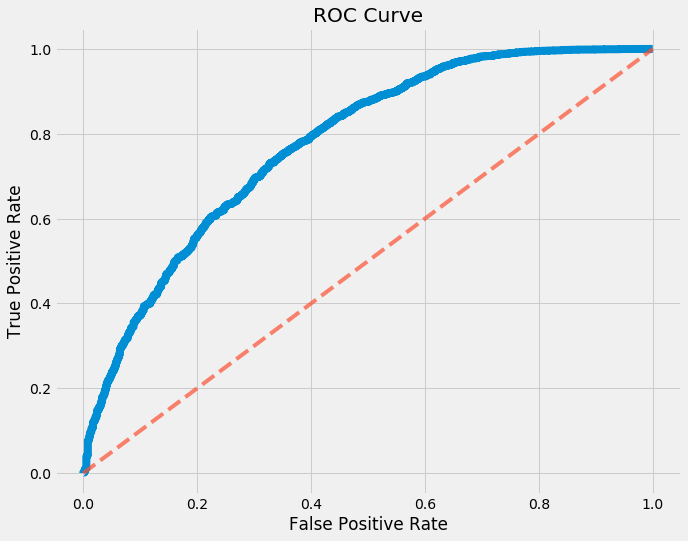

In [215]:
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, linewidth=8)
plt.plot([0,1], [0,1], "--", alpha=.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [216]:
roc_auc_score(y_test, test_probs)

0.7757432277318642

In [217]:
cross_val_score(LogisticRegression(), X, y, cv = 5, scoring="roc_auc").mean()

0.7680490798100521

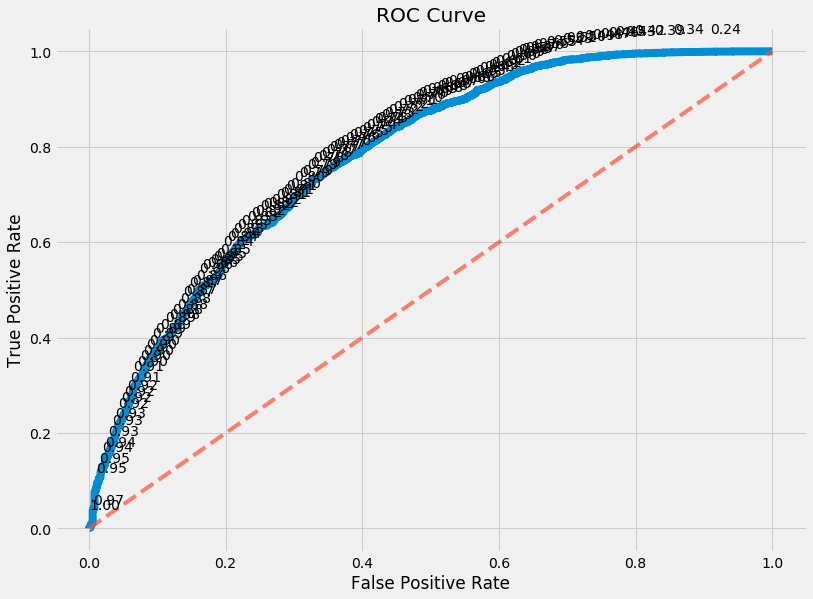

In [218]:
plt.figure(figsize=(12,9))
plt.plot(fpr, tpr, linewidth=8)
plt.plot([0,1], [0,1], "--", alpha=.7)
for label, x, y in zip(thres[::10], fpr[::10], tpr[::10]):
    plt.annotate("{0:.2f}".format(label), xy=(x, y + .04))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

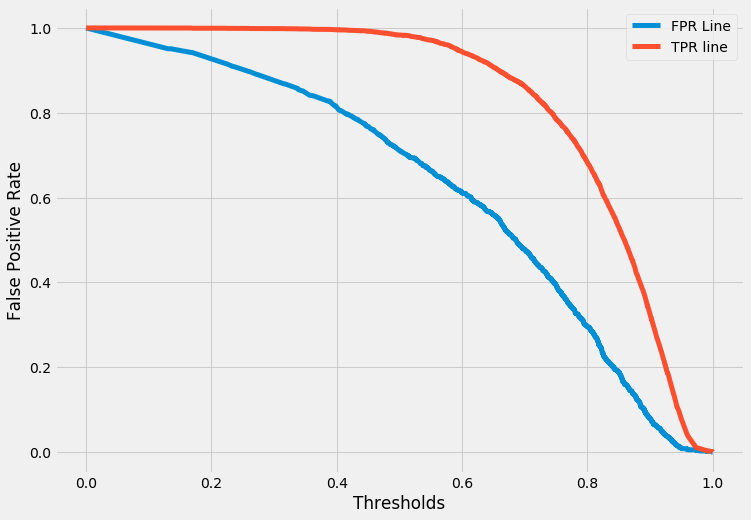

In [219]:
plt.figure(figsize=(11,8))
plt.plot(thres, fpr, linewidth=5, label = "FPR Line")
plt.plot(thres, tpr, linewidth=5, label = "TPR line")
plt.xlabel("Thresholds")
plt.ylabel("False Positive Rate")
plt.legend()
plt.show();

In [4]:
#Load in data dictionary
data_dict = pd.read_csv("../../data/lending_club/the_data_dictionary.csv")
data_dict

,dtypes,name,description
0,float64,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit ..."
1,object,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
2,float64,installment,The monthly payment owed by the borrower if the loan originates.
3,object,grade,LC assigned loan grade
4,object,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one yea...
5,object,home_ownership,The home ownership status provided by the borrower during registration or obtained from the cred...
6,float64,annual_inc,The self-reported annual income provided by the borrower during registration.
7,object,verification_status,"Indicates if income was verified by LC, not verified, or if the income source was verified"
8,object,loan_status,Current status of the loan
9,object,purpose,A category provided by the borrower for the loan request.


In [221]:
#Load in test data when you're ready 
test = pd.read_csv("../../data/lending_club/challenge_testing_data.csv")
test.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,desc,purpose,title,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
0,1077430,2500.0,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,0,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking a...,car,bike,1.00,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,Oct-2016,0.0,0.0,0.0
1,1076863,10000.0,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,1,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & ...",other,personel,20.00,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,Apr-2016,0.0,0.0,0.0
2,1072053,3000.0,3000.0,36 months,18.64%,109.43,E,MKC Accounting,9 years,RENT,48000.0,Source Verified,1,Borrower added on 12/16/11 > Downpayment for a car.<br>,car,Car Downpayment,5.35,0.0,660.0,664.0,2.0,4.0,0.0,8221.0,87.5%,4.0,Dec-2014,0.0,0.0,0.0
3,1071570,5375.0,5375.0,60 months,12.69%,121.45,B,Starbucks,< 1 year,RENT,15000.0,Verified,0,Borrower added on 12/16/11 > I'm trying to build up my credit history. I live with my brother ...,other,Building my credit history.,18.08,0.0,725.0,729.0,0.0,2.0,0.0,9279.0,36.5%,3.0,Dec-2016,0.0,0.0,0.0
4,1069866,3000.0,3000.0,36 months,9.91%,96.68,B,Target,3 years,RENT,15000.0,Source Verified,1,Borrower added on 12/19/11 > I intend to pay this debt off within half the time allotted.Home-...,credit_card,citicard fund,12.56,0.0,705.0,709.0,2.0,11.0,0.0,7323.0,43.1%,11.0,Feb-2017,0.0,0.0,0.0


In [224]:
test.rename(columns={'dti': 'debt_to_income'}, inplace=True)
test.head()



,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,desc,purpose,title,debt_to_income,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
0,1077430,2500.0,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,2,30000.0,Source Verified,0,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking a...,car,bike,1.00,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,Oct-2016,0.0,0.0,0.0
1,1076863,10000.0,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,2,49200.0,Source Verified,1,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & ...",other,personel,20.00,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,Apr-2016,0.0,0.0,0.0
2,1072053,3000.0,3000.0,36 months,18.64%,109.43,E,MKC Accounting,9 years,2,48000.0,Source Verified,1,Borrower added on 12/16/11 > Downpayment for a car.<br>,car,Car Downpayment,5.35,0.0,660.0,664.0,2.0,4.0,0.0,8221.0,87.5%,4.0,Dec-2014,0.0,0.0,0.0
3,1071570,5375.0,5375.0,60 months,12.69%,121.45,B,Starbucks,< 1 year,2,15000.0,Verified,0,Borrower added on 12/16/11 > I'm trying to build up my credit history. I live with my brother ...,other,Building my credit history.,18.08,0.0,725.0,729.0,0.0,2.0,0.0,9279.0,36.5%,3.0,Dec-2016,0.0,0.0,0.0
4,1069866,3000.0,3000.0,36 months,9.91%,96.68,B,Target,3 years,2,15000.0,Source Verified,1,Borrower added on 12/19/11 > I intend to pay this debt off within half the time allotted.Home-...,credit_card,citicard fund,12.56,0.0,705.0,709.0,2.0,11.0,0.0,7323.0,43.1%,11.0,Feb-2017,0.0,0.0,0.0


In [227]:
test.int_rate = test.int_rate.str.replace("%","")
test.head()


,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,desc,purpose,title,debt_to_income,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
0,1077430,2500.0,2500.0,60 months,15.27,59.83,C,Ryder,< 1 year,2,30000.0,Source Verified,0,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking a...,car,bike,1.00,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,Oct-2016,0.0,0.0,0.0
1,1076863,10000.0,10000.0,36 months,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,2,49200.0,Source Verified,1,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & ...",other,personel,20.00,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,Apr-2016,0.0,0.0,0.0
2,1072053,3000.0,3000.0,36 months,18.64,109.43,E,MKC Accounting,9 years,2,48000.0,Source Verified,1,Borrower added on 12/16/11 > Downpayment for a car.<br>,car,Car Downpayment,5.35,0.0,660.0,664.0,2.0,4.0,0.0,8221.0,87.5%,4.0,Dec-2014,0.0,0.0,0.0
3,1071570,5375.0,5375.0,60 months,12.69,121.45,B,Starbucks,< 1 year,2,15000.0,Verified,0,Borrower added on 12/16/11 > I'm trying to build up my credit history. I live with my brother ...,other,Building my credit history.,18.08,0.0,725.0,729.0,0.0,2.0,0.0,9279.0,36.5%,3.0,Dec-2016,0.0,0.0,0.0
4,1069866,3000.0,3000.0,36 months,9.91,96.68,B,Target,3 years,2,15000.0,Source Verified,1,Borrower added on 12/19/11 > I intend to pay this debt off within half the time allotted.Home-...,credit_card,citicard fund,12.56,0.0,705.0,709.0,2.0,11.0,0.0,7323.0,43.1%,11.0,Feb-2017,0.0,0.0,0.0


In [230]:
test.int_rate = test.int_rate.astype("float64")
test.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,desc,purpose,title,debt_to_income,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
0,1077430,2500.0,2500.0,60 months,15.27,59.83,C,Ryder,< 1 year,2,30000.0,Source Verified,0,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking a...,car,bike,1.00,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,Oct-2016,0.0,0.0,0.0
1,1076863,10000.0,10000.0,36 months,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,2,49200.0,Source Verified,1,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & ...",other,personel,20.00,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,21,37.0,Apr-2016,0.0,0.0,0.0
2,1072053,3000.0,3000.0,36 months,18.64,109.43,E,MKC Accounting,9 years,2,48000.0,Source Verified,1,Borrower added on 12/16/11 > Downpayment for a car.<br>,car,Car Downpayment,5.35,0.0,660.0,664.0,2.0,4.0,0.0,8221.0,87.5,4.0,Dec-2014,0.0,0.0,0.0
3,1071570,5375.0,5375.0,60 months,12.69,121.45,B,Starbucks,< 1 year,2,15000.0,Verified,0,Borrower added on 12/16/11 > I'm trying to build up my credit history. I live with my brother ...,other,Building my credit history.,18.08,0.0,725.0,729.0,0.0,2.0,0.0,9279.0,36.5,3.0,Dec-2016,0.0,0.0,0.0
4,1069866,3000.0,3000.0,36 months,9.91,96.68,B,Target,3 years,2,15000.0,Source Verified,1,Borrower added on 12/19/11 > I intend to pay this debt off within half the time allotted.Home-...,credit_card,citicard fund,12.56,0.0,705.0,709.0,2.0,11.0,0.0,7323.0,43.1,11.0,Feb-2017,0.0,0.0,0.0


In [231]:
test.revol_util = test.revol_util.str.replace("%","")
test.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,desc,purpose,title,debt_to_income,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
0,1077430,2500.0,2500.0,60 months,15.27,59.83,C,Ryder,< 1 year,2,30000.0,Source Verified,0,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking a...,car,bike,1.00,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,Oct-2016,0.0,0.0,0.0
1,1076863,10000.0,10000.0,36 months,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,2,49200.0,Source Verified,1,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & ...",other,personel,20.00,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,21,37.0,Apr-2016,0.0,0.0,0.0
2,1072053,3000.0,3000.0,36 months,18.64,109.43,E,MKC Accounting,9 years,2,48000.0,Source Verified,1,Borrower added on 12/16/11 > Downpayment for a car.<br>,car,Car Downpayment,5.35,0.0,660.0,664.0,2.0,4.0,0.0,8221.0,87.5,4.0,Dec-2014,0.0,0.0,0.0
3,1071570,5375.0,5375.0,60 months,12.69,121.45,B,Starbucks,< 1 year,2,15000.0,Verified,0,Borrower added on 12/16/11 > I'm trying to build up my credit history. I live with my brother ...,other,Building my credit history.,18.08,0.0,725.0,729.0,0.0,2.0,0.0,9279.0,36.5,3.0,Dec-2016,0.0,0.0,0.0
4,1069866,3000.0,3000.0,36 months,9.91,96.68,B,Target,3 years,2,15000.0,Source Verified,1,Borrower added on 12/19/11 > I intend to pay this debt off within half the time allotted.Home-...,credit_card,citicard fund,12.56,0.0,705.0,709.0,2.0,11.0,0.0,7323.0,43.1,11.0,Feb-2017,0.0,0.0,0.0


In [233]:
test.replace({'purpose' : { 'debt_consolidation' : 1, 'other' : 2, 'credit_card' : 3, 'major_purchase' : 4, 'small_business' : 5, 'home_improvement' : 6, 'car' : 7, 'house' :8, 'wedding' : 9, 'moving' : 10, 'vacation':11, 'medical':12, 'renewable_energy':13, 'educational':14}}, inplace = True)
test.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,desc,purpose,title,debt_to_income,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
0,1077430,2500.0,2500.0,60 months,15.27,59.83,C,Ryder,< 1 year,2,30000.0,Source Verified,0,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking a...,7,bike,1.00,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,Oct-2016,0.0,0.0,0.0
1,1076863,10000.0,10000.0,36 months,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,2,49200.0,Source Verified,1,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & ...",2,personel,20.00,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,21,37.0,Apr-2016,0.0,0.0,0.0
2,1072053,3000.0,3000.0,36 months,18.64,109.43,E,MKC Accounting,9 years,2,48000.0,Source Verified,1,Borrower added on 12/16/11 > Downpayment for a car.<br>,7,Car Downpayment,5.35,0.0,660.0,664.0,2.0,4.0,0.0,8221.0,87.5,4.0,Dec-2014,0.0,0.0,0.0
3,1071570,5375.0,5375.0,60 months,12.69,121.45,B,Starbucks,< 1 year,2,15000.0,Verified,0,Borrower added on 12/16/11 > I'm trying to build up my credit history. I live with my brother ...,2,Building my credit history.,18.08,0.0,725.0,729.0,0.0,2.0,0.0,9279.0,36.5,3.0,Dec-2016,0.0,0.0,0.0
4,1069866,3000.0,3000.0,36 months,9.91,96.68,B,Target,3 years,2,15000.0,Source Verified,1,Borrower added on 12/19/11 > I intend to pay this debt off within half the time allotted.Home-...,3,citicard fund,12.56,0.0,705.0,709.0,2.0,11.0,0.0,7323.0,43.1,11.0,Feb-2017,0.0,0.0,0.0


In [234]:
cols = ["loan_amnt", "annual_inc", "fico_range_low", "total_acc","int_rate", "installment", "open_acc","revol_bal", "purpose", "revol_util", "tax_liens","debt_to_income","delinq_2yrs","inq_last_6mths","loan_status"]
newdata = test[cols]
newdata.head()

,loan_amnt,annual_inc,fico_range_low,total_acc,int_rate,installment,open_acc,revol_bal,purpose,revol_util,tax_liens,debt_to_income,delinq_2yrs,inq_last_6mths,loan_status
0,2500.0,30000.0,740.0,4.0,15.27,59.83,3.0,1687.0,7,9.4,0.0,1.00,0.0,5.0,0
1,10000.0,49200.0,690.0,37.0,13.49,339.31,10.0,5598.0,2,21,0.0,20.00,0.0,1.0,1
2,3000.0,48000.0,660.0,4.0,18.64,109.43,4.0,8221.0,7,87.5,0.0,5.35,0.0,2.0,1
3,5375.0,15000.0,725.0,3.0,12.69,121.45,2.0,9279.0,2,36.5,0.0,18.08,0.0,0.0,0
4,3000.0,15000.0,705.0,11.0,9.91,96.68,11.0,7323.0,3,43.1,0.0,12.56,0.0,2.0,1


In [237]:
X = newdata.drop("loan_status", axis=1)
y = newdata.loan_status
lr = LogisticRegression()
lr.fit(X,y)
score = lr.score(X,y)
print ("The model produces an accuracy score of {:.2f} percent".format(score*100))

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4,
                                                    random_state=20)
lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)
testing_score = accuracy_score(y_test, preds)
print ("The model accurately classified {:.2f} percent of the testing data".format(testing_score*100))

The model produces an accuracy score of 81.95 percent
The model accurately classified 82.03 percent of the testing data


In [ ]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit()

In [265]:
probs = lr.predict_proba(X)[:, 1]
probs

array([0.31864417, 0.83790382, 0.46370427, ..., 0.65522475, 0.71599916,
       0.83959779])

Here is the threshold function. Input your probabilities for class 1 and set a probability threshold of your choice. The default threshold is 0.5. The output will be 1's and 0s, 1 values for all the values that are greater or equal to your predetermined threshold value.

In [252]:

def threshold(probs, thres = 0.5):
    output = np.where(probs >= thres, 1, 0)
    return output

This is the profit function. It takes in a dataframe with the loan_amnt, int_rate, target variable, and class predictions values.

- It first checks to see if a row has 0 in the outcome column and 1 in the predicted (false positive) and returns the negative value of the loan_amnt. This is how much money you lost for loans that mean that condition.

- Then it checks for true positives, meaning conditions where both the target and predicted values equal 1, then return the loan_amnt times the int_rate divided by 100. This is how much money you made from loans that meet this condition.

- Everything else gets a zero.

In [258]:
def profit_function(data):
    if data.loan_status == 0 and data.predicted == 1:
        return -1 *data.loan_amnt
    elif data.loan_status == 1 and data.predicted == 1:
        return data.loan_amnt * (data.int_rate/100.)
    else:
        return 0

In [269]:
probs

array([0.31864417, 0.83790382, 0.46370427, ..., 0.65522475, 0.71599916,
       0.83959779])

In [273]:
scores = {}
for i in np.linspace(.85, 1, 40):
    preds = threshold(probs, thres=i)
    profit_df["predicted"] = preds
    profit_series = profit_df.apply(profit_function, axis = 1)
    scores[str(i)] = profit_series.sum()
scores

{'0.85': -705314.5350000007,
 '0.8538461538461538': -462622.55999999953,
 '0.8576923076923076': -283695.9400000007,
 '0.8615384615384615': -199698.07750000007,
 '0.8653846153846154': -171192.7475,
 '0.8692307692307693': -43229.78500000021,
 '0.8730769230769231': -42265.60250000027,
 '0.8769230769230769': 56597.26999999938,
 '0.8807692307692307': 137059.11999999965,
 '0.8846153846153846': 269641.7649999997,
 '0.8884615384615384': 275679.99499999924,
 '0.8923076923076922': 290765.93749999953,
 '0.8961538461538462': 363419.4024999995,
 '0.9': 373775.5174999997,
 '0.9038461538461539': 372250.36999999936,
 '0.9076923076923077': 302405.6474999993,
 '0.9115384615384615': 404002.4849999991,
 '0.9153846153846154': 344886.3924999994,
 '0.9192307692307692': 602819.1049999999,
 '0.9230769230769231': 611452.5325,
 '0.926923076923077': 558495.6874999988,
 '0.9307692307692308': 570836.8424999987,
 '0.9346153846153846': 470851.17249999894,
 '0.9384615384615385': 405407.71249999903,
 '0.942307692307692

In [275]:
sorted(scores.items(), key = lambda x:x[1], reverse = True)[:5]

[('0.9230769230769231', 611452.5325),
 ('0.9192307692307692', 602819.1049999999),
 ('0.9307692307692308', 570836.8424999987),
 ('0.926923076923077', 558495.6874999988),
 ('0.9346153846153846', 470851.17249999894)]

In [255]:
profit_df = pd.DataFrame(newdata)

profit_df.head()

,loan_amnt,annual_inc,fico_range_low,total_acc,int_rate,installment,open_acc,revol_bal,purpose,revol_util,tax_liens,debt_to_income,delinq_2yrs,inq_last_6mths,loan_status,predicted
0,2500.0,30000.0,740.0,4.0,15.27,59.83,3.0,1687.0,7,9.4,0.0,1.00,0.0,5.0,0,0
1,10000.0,49200.0,690.0,37.0,13.49,339.31,10.0,5598.0,2,21,0.0,20.00,0.0,1.0,1,1
2,3000.0,48000.0,660.0,4.0,18.64,109.43,4.0,8221.0,7,87.5,0.0,5.35,0.0,2.0,1,0
3,5375.0,15000.0,725.0,3.0,12.69,121.45,2.0,9279.0,2,36.5,0.0,18.08,0.0,0.0,0,1
4,3000.0,15000.0,705.0,11.0,9.91,96.68,11.0,7323.0,3,43.1,0.0,12.56,0.0,2.0,1,1


In [267]:

profit_df.head()

,loan_amnt,annual_inc,fico_range_low,total_acc,int_rate,installment,open_acc,revol_bal,purpose,revol_util,tax_liens,debt_to_income,delinq_2yrs,inq_last_6mths,loan_status,predicted
0,2500.0,30000.0,740.0,4.0,15.27,59.83,3.0,1687.0,7,9.4,0.0,1.00,0.0,5.0,0,0
1,10000.0,49200.0,690.0,37.0,13.49,339.31,10.0,5598.0,2,21,0.0,20.00,0.0,1.0,1,0
2,3000.0,48000.0,660.0,4.0,18.64,109.43,4.0,8221.0,7,87.5,0.0,5.35,0.0,2.0,1,0
3,5375.0,15000.0,725.0,3.0,12.69,121.45,2.0,9279.0,2,36.5,0.0,18.08,0.0,0.0,0,0
4,3000.0,15000.0,705.0,11.0,9.91,96.68,11.0,7323.0,3,43.1,0.0,12.56,0.0,2.0,1,0


In [268]:
profit_series = profit_df.apply(profit_function, axis = 1)
profit_series.sum()

373775.5174999997

In [260]:
profit_series.sum()

-11622594.845000023

Here's an example of using the threshold and profit_functions

In [ ]:
#List of probabilities
probs = np.array([0.2, 0.5, 0.8, 0.9, 0.1, 0.75])

#Pass in probabilities into threshold function, using .7 as threshold
preds = threshold(probs, thres=.7)
preds

In [ ]:
sample_df = {"loan_amnt": [1000, 500, 200, 5000, 3000, 6000],
            "int_rate": [18, 20, 4, 5, 2, 10], 
            "target": [0, 1, 0, 1, 0, 1]}

#Put dictionary in data frame

profit_df = pd.DataFrame(sample_df)

profit_df

In [ ]:
#Add in predictions

profit_df["predicted"] = preds
profit_df

In [ ]:
#Apply function onto data frame
profit_series = profit_df.apply(profit_function, axis = 1)
profit_series

In [ ]:
#Sum up profits and losses
profit_series.sum()

This model made $650

## Let the games begin!!